import lib

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import os

dataset loading

In [2]:

df = pd.read_csv("C:\\liver_cirrhosis_project\\training\\cirrhosis.csv.xls")
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


Handle missing 

In [3]:
df.drop(columns=["ID"], inplace=True)
df.dropna(inplace=True)

 Encode 

In [4]:
df["Sex"] = df["Sex"].map({"M": 1, "F": 0})
df["Ascites"] = df["Ascites"].map({"Y": 1, "N": 0})
df["Hepatomegaly"] = df["Hepatomegaly"].map({"Y": 1, "N": 0})
df["Spiders"] = df["Spiders"].map({"Y": 1, "N": 0})

Feature/Target Split

In [5]:
selected_features = ['Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
                     'Edema', 'Bilirubin', 'Albumin', 'Alk_Phos', 'SGOT']
X = df[selected_features]
y = df["Status"]

 Data Normalization


In [6]:
X["Edema"] = X["Edema"].map({"N": 0, "S": 0.5, "Y": 1})
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17000\3955007553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Edema"] = X["Edema"].map({"N": 0, "S": 0.5, "Y": 1})


split and train data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model train

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


modal evaluation

In [9]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7857142857142857
Classification Report:
               precision    recall  f1-score   support

           C       0.75      0.90      0.82        30
           D       0.85      0.65      0.74        26

    accuracy                           0.79        56
   macro avg       0.80      0.78      0.78        56
weighted avg       0.80      0.79      0.78        56



confusion matrix

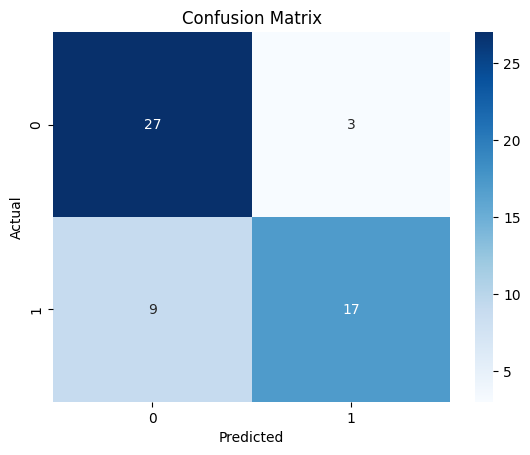

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


save the modal

In [11]:
joblib.dump(model, "rf_model_10features.pkl")
joblib.dump(scaler, "scaler_10features.pkl")

['scaler_10features.pkl']